In [1]:
import os
import sys
import glob
from lxml import etree

In [2]:
fixtures=os.path.join(os.path.dirname(os.path.realpath('.')),'bluclobber','test','fixtures')
print fixtures

/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures


In [3]:
zip_code='000000037'
book_code='000000218'

In [4]:
manchester_1=glob.glob(os.path.join(fixtures,zip_code+'*'))[0]
print manchester_1

/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/000000037_metadata.xml


In [5]:
metadata_path=glob.glob(os.path.join(fixtures,book_code+'_metadata.xml'))[0]
print metadata_path

/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/000000218_metadata.xml


In [6]:
data_paths=glob.glob(os.path.join(fixtures,'ALTO/',book_code +'*'))
print data_paths

['/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/ALTO/000000218_03_000296.xml', '/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/ALTO/000000218_03_000282.xml', '/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/ALTO/000000218_03_000269.xml', '/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/ALTO/000000218_03_000255.xml', '/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/ALTO/000000218_03_000241.xml', '/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/ALTO/000000218_03_000094.xml', '/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/ALTO/000000218_03_000080.xml', '/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/ALTO/000000218_03_000057.xml', '/Users/rosafilgueira/EPCC/ATI-SE/Humanities/cluster-code/bluclobber/test/fixtures/ALTO

In [7]:
metadata=etree.parse(metadata_path)

In [8]:
metadata

In [9]:
pages=[etree.parse(path) for path in data_paths]

In [10]:
page14=pages[15]

In [11]:
page_texts=[open(path).read() for path in data_paths]

In [12]:
print page_texts[15]

<?xml version="1.0" encoding="UTF-8"?>
<alto xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://www.bl.uk/schemas/alto/alto-1-4.xsd" xmlns:xlink="http://www.w3.org/1999/xlink">
	<Description>
		<MeasurementUnit>mm10</MeasurementUnit>
		<sourceImageInformation>
			<fileName>//head1/IN/2007-46/A0010888503.3/008055.jp2</fileName>
		</sourceImageInformation>
		<OCRProcessing ID="OCRPROCESSING_1">
			<preProcessingStep>
				<processingSoftware>
					<softwareCreator>CCS Content Conversion Specialists GmbH, Germany</softwareCreator>
					<softwareName>CCS docWORKS</softwareName>
					<softwareVersion>6.1-0.62</softwareVersion>
				</processingSoftware>
			</preProcessingStep>
			<ocrProcessingStep>
				<processingSoftware>
					<softwareCreator>ABBYY (BIT Software), Russia</softwareCreator>
					<softwareName>Finereader</softwareName>
				</processingSoftware>
			</ocrProcessingStep>
		</OCRProcessing>
	</Description>
	<Styles>
		<TextStyle ID="TXT_0"

In [13]:
' '.join(page14.xpath('//*/@CONTENT'))

'71 LIGHTLY LOVING, LIGHTLY LOST. apart from the ordinary world, so exclusively divided between self-devotion and one grief, that to the unconscious grandeur of her soul all things grand came home. From the con - stant habit of measuring things by an Infinite standard, she had grown to be lenient to much that shocks the world, and to be only severe to such derelictions as it takes not into account. To her, Berthe de Mottefort, who had re - nounced the world for the sake of the man she loved, was not an object of Pharisaical loathing, as she was stated to be to the dainty dames who reputed themselves virtuous because they kept upon good terms with the world ; she was an object of intense commiseration, because she had sacrificed herself. And poor dear Aunt Clementine, who was a genuine Christian, and did her best and utmost to follow her divine Master\'s teachings, thought that if he could be so pitiful towards the woman whom he told to "go and sin no more," it was not incumbent upon he

In [14]:
string_els=page14.xpath('//String')

In [15]:
string_els[0].get('CONTENT')

'71'

In [16]:
class PageElement(object):
    def __init__(self,element):
        self.x=int(element.get('HPOS'))
        self.y=int(element.get('VPOS'))
        self.width=int(element.get('WIDTH'))
        self.height=int(element.get('HEIGHT'))
        self.text=element.get('CONTENT')
    def bbox(self):
        return dict(
            x=self.x,
            y=self.y,
            width=self.width,
            height=self.height,
            alpha=0.1,
        )

In [17]:
class Page(object):
    def __init__(self,tree):
        self.element=tree.xpath('//Page')[0]
        self.width=int(self.element.get('WIDTH'))
        self.height=int(self.element.get('HEIGHT'))
        self.elements=[PageElement(el) for el in tree.xpath('//String')]

In [18]:
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline


{'transform': CompositeGenericTransform(TransformWrapper(BlendedAffine2D(IdentityTransform(),IdentityTransform())), CompositeGenericTransform(BboxTransformFrom(TransformedBbox(Bbox([[0.0, 1710.0], [1079.0, 0.0]]), TransformWrapper(BlendedAffine2D(IdentityTransform(),IdentityTransform())))), BboxTransformTo(TransformedBbox(Bbox([[0.125, 0.125], [0.9, 0.88]]), BboxTransformTo(TransformedBbox(Bbox([[0.0, 0.0], [8.0, 6.0]]), Affine2D(array([[72.,  0.,  0.],
       [ 0., 72.,  0.],
       [ 0.,  0.,  1.]])))))))), 'height': 27, 'width': 31, 'x': 874, 'y': 79, 'alpha': 0.1}


TypeError: type object got multiple values for keyword argument 'transform'

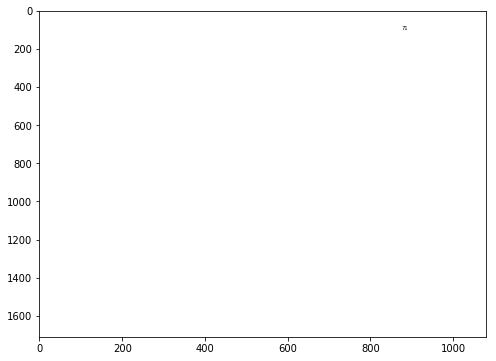

In [21]:
fig=figure(figsize=[8,6])

page=Page(page14)
axes=fig.add_subplot(1,1,1,xlim=[0,page.width],ylim=[page.height,0])
for element in page.elements:
    ebox=element.bbox()
    ebox['transform']=axes.transData
    # first, render a text patch
    text=axes.text(element.x,element.y,element.text, verticalalignment='top', 
                    horizontalalignment='left')
                    #fontsize=font_scaling,bbox=box)
    # then, determine its bbox in data units
    renderer = fig.canvas.get_renderer()
    tbox=text.get_window_extent(renderer).transformed(axes.transData.inverted())
    # then, change the fontsize to match its true bbox
    theight=-1.0*tbox.height
    text.set_fontsize(ebox['height']*text.get_fontsize()/theight)
    # and update the bbox
    print ebox
    text.set_bbox(ebox)
    #text.set_transform(ebox['transform'])
